<a href="https://colab.research.google.com/github/carlosaragao/PLN/blob/main/Classificador_Avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

avaliacoes = pd.read_csv("b2w.csv")

In [ ]:
avaliacoes.head()

original_index                                        review_text  \
0           11955  Bem macio e felpudo...recomendo.  Preço imbatí...   
1           35478  Produto excepcional!  recomendo!!! inovador e ...   
2          122760  recebi o produto antes do prazo mas veio com d...   
3           17114  Bom custo beneficio. Adequado para pessoas que...   
4           19112  Além de higiênico tem o tamanho ideal. Só falt...   

                               review_text_processed  \
0  bem macio e felpudo...recomendo.  preco imbati...   
1  produto excepcional!  recomendo!!! inovador e ...   
2  recebi o produto antes do prazo mas veio com d...   
3  bom custo beneficio. adequado para pessoas que...   
4  alem de higienico tem o tamanho ideal. so falt...   

                               review_text_tokenized  polarity  rating  \
0  ['bem', 'macio', 'felpudo', 'recomendo', 'prec...       1.0       4   
1  ['produto', 'excepcional', 'recomendo', 'inova...       1.0       5   
2  ['recebi', 'produto', 'antes', 'do', 'prazo', ...       0.0       1   
3  ['bom', 'custo', 'beneficio', 'adequado', 'par...       1.0       5   
4  ['alem', 'de', 'higienico', 'tem', 'tamanho', ...       NaN       3   

   kfold_polarity  kfold_rating  
0               1             1  
1               1             1  
2               1             1  
3               1             1  
4              -1             1

In [ ]:
avaliacoes = avaliacoes.drop(["original_index", "review_text_processed", "review_text_tokenized",
                              "rating", "kfold_polarity", "kfold_rating"], axis = 1)

In [ ]:
avaliacoes.head()

review_text  polarity
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1  Produto excepcional!  recomendo!!! inovador e ...       1.0
2  recebi o produto antes do prazo mas veio com d...       0.0
3  Bom custo beneficio. Adequado para pessoas que...       1.0
4  Além de higiênico tem o tamanho ideal. Só falt...       NaN

In [ ]:
avaliacoes.dropna(inplace=True, axis = 0)
avaliacoes

review_text  polarity
0       Bem macio e felpudo...recomendo.  Preço imbatí...       1.0
1       Produto excepcional!  recomendo!!! inovador e ...       1.0
2       recebi o produto antes do prazo mas veio com d...       0.0
3       Bom custo beneficio. Adequado para pessoas que...       1.0
5       ótmo produto atendeu as expectativas, a entreg...       1.0
...                                                   ...       ...
132367  Ótimo jogo, um dos melhores que joguei. Entreg...       1.0
132368  SMARTHPHONE  PERFEITO  MUITO  BOM  E  A  ECONO...       1.0
132369  Eu estou muito chateado com isso gostaria que ...       0.0
132371  O produto anunciado no site dizia ser  100% al...       0.0
132372  Não recebi o produto e consta como entregue no...       0.0

[116058 rows x 2 columns]

In [ ]:
avaliacoes.polarity.value_counts()

1.0    80300
0.0    35758
Name: polarity, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(
    avaliacoes.review_text,
    avaliacoes.polarity,
    stratify=avaliacoes.polarity,
    random_state = 71)

In [ ]:
classe_teste

70278     1.0
115089    1.0
128187    0.0
68697     0.0
50025     1.0
         ... 
25617     1.0
106407    1.0
26220     1.0
109010    0.0
49437     0.0
Name: polarity, Length: 29015, dtype: float64

In [ ]:
# from sklearn.linear_model import LogisticRegression

# regressao_logistica = LogisticRegression()

# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(acuracia)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Este produto é muito bom", "Este produto é muito ruim"]
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [ ]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns = vetorizar.get_feature_names_out())

In [ ]:
matriz_esparsa

bom  este  muito  produto  ruim
0    1     1      1        1     0
1    0     1      1        1     1

In [ ]:
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 50508)


In [ ]:
vetorizar = CountVectorizer(max_features = 100)
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [ ]:
from sklearn.linear_model import LogisticRegression

treino, teste, classe_treino, classe_teste = train_test_split(
    bag_of_words,
    avaliacoes.polarity,
    stratify=avaliacoes.polarity,
    random_state = 71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.8870239531276926


In [ ]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
  vetorizar = CountVectorizer(max_features = 100)
  bag_of_words = vetorizar.fit_transform(avaliacoes[coluna_texto])

  treino, teste, classe_treino, classe_teste = train_test_split(
    bag_of_words,
    avaliacoes[coluna_sentimento],
    stratify=avaliacoes[coluna_sentimento],
    random_state = 71)

  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)

In [ ]:
print(treinar_modelo(avaliacoes, "review_text", "polarity"))

0.8870239531276926


# Word Cloud

Estamos fazendo uma Word Cloud


In [ ]:
from wordcloud import WordCloud

todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)

In [ ]:
len(todas_avaliacoes)

116058

In [ ]:
len(todas_palavras)

16570763

In [ ]:
nuvem_palavras = WordCloud().generate(todas_palavras)

In [ ]:
nuvem_palavras

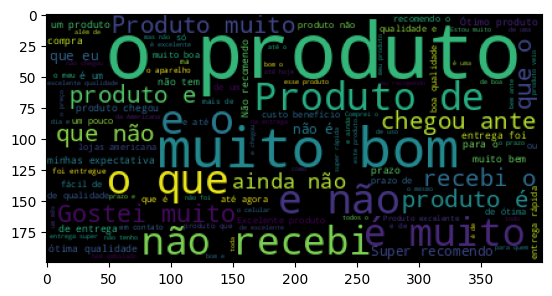

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)

In [ ]:
nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110
                           ).generate(todas_palavras)

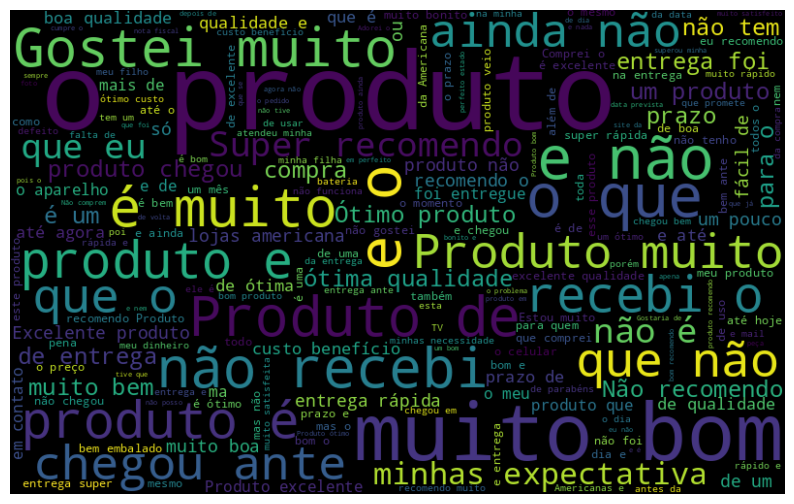

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def word_cloud_neg(dados, coluna_texto):
  texto_negativo = dados.query("polarity == 0")
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110,
                           collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
def word_cloud_pos(dados, coluna_texto):
  texto_negativo = dados.query("polarity == 1")
  todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
  todas_palavras = ' '.join(todas_avaliacoes)
  nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110,
                           collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

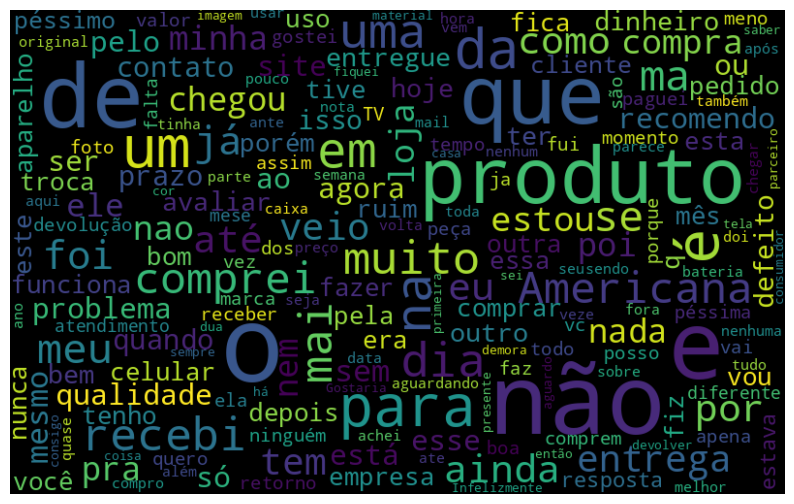

In [ ]:
word_cloud_neg(avaliacoes, "review_text")

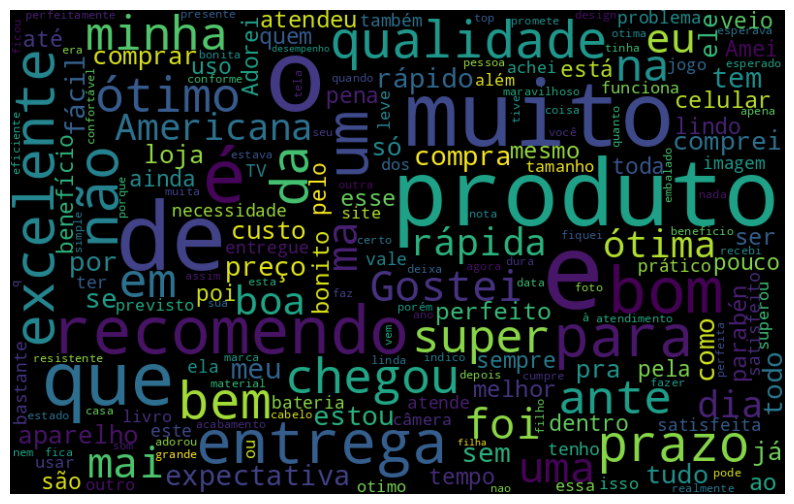

In [ ]:
word_cloud_pos(avaliacoes, "review_text")

# NLTK

In [ ]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
corpus = ["Muito bom este produto", "Muito ruim este produto"]
frequencia = nltk.FreqDist(corpus)
frequencia

FreqDist({'Muito bom este produto': 1, 'Muito ruim este produto': 1})

In [ ]:
from nltk import tokenize

frase = "Muito bom este produto"

token_por_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaco.tokenize(frase)
token_frase

['Muito', 'bom', 'este', 'produto']

In [ ]:
token_por_espaco = tokenize.WhitespaceTokenizer()
token_dataset = token_por_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_dataset)

In [ ]:
frequencia

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [ ]:
dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequencia": list(frequencia.values())})

In [ ]:
dataframe_frequencia.head()

Palavra  Frequencia
0                   Bem         413
1                 macio         216
2                     e       89308
3  felpudo...recomendo.           1
4                 Preço         334

In [ ]:
dataframe_frequencia.nlargest(columns = "Frequencia", n = 10)

Palavra  Frequencia
2         e       89308
20        o       76053
17       de       75791
39        a       66640
50      que       53574
33      não       44253
23       do       36776
43    muito       36566
60        é       36314
21  produto       34983

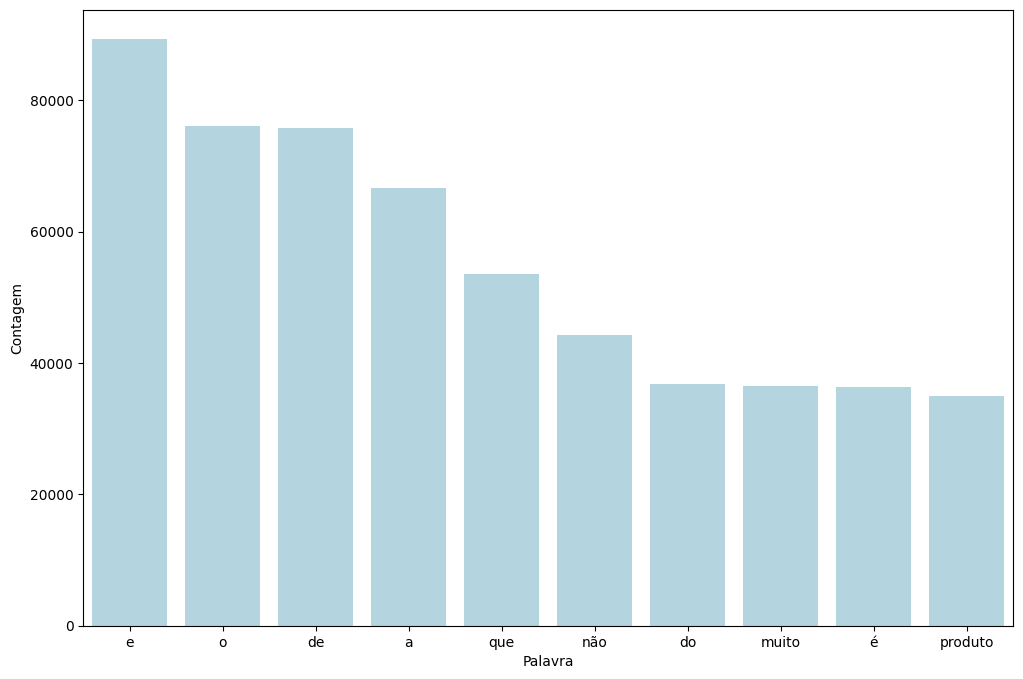

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data = dataframe_frequencia.nlargest(columns = "Frequencia", n = 10),
                 x = "Palavra", y = "Frequencia", color = "lightblue")
ax.set(ylabel = "Contagem")
plt.show()

In [ ]:
def grafico(dados, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in dados[coluna_texto]])
  token_frase = token_por_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                       "Frequencia": list(frequencia.values())})
  dataframe_frequencia = dataframe_frequencia.nlargest(columns = "Frequencia", n = quantidade)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data = dataframe_frequencia,
                  x = "Palavra", y = "Frequencia", color = "lightblue")
  ax.set(ylabel = "Contagem")
  plt.show()

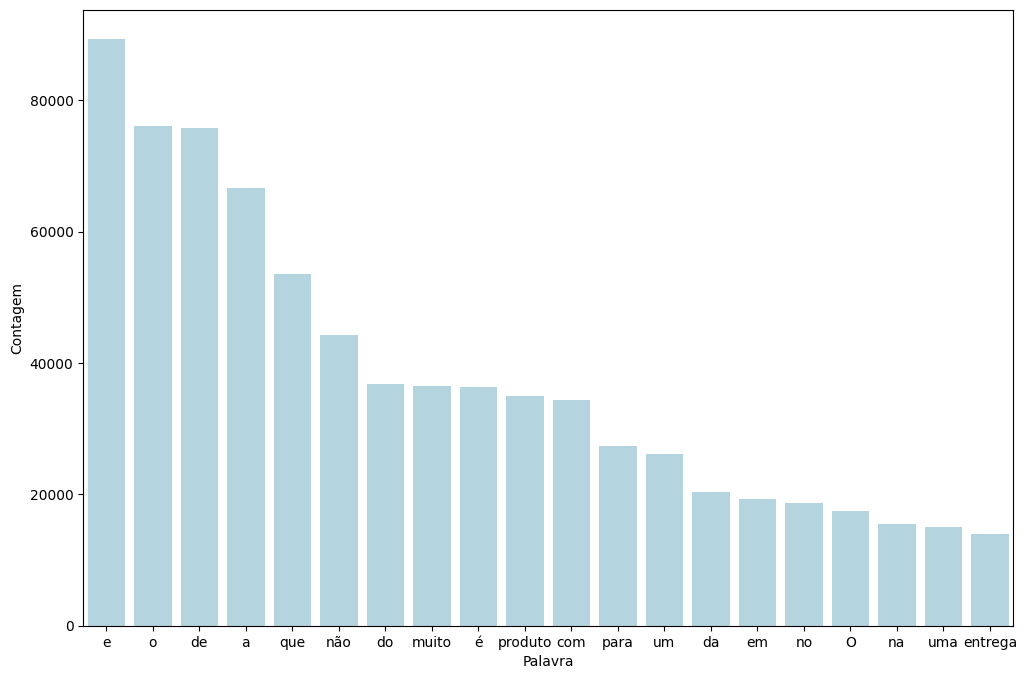

In [ ]:
grafico(avaliacoes, "review_text", 20)

# Remoção de Stop Words

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [ ]:
frase_processada = list()
for avaliacao in avaliacoes.review_text:
  nova_frase = list()
  palavras_texto = token_por_espaco.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  
0  Bem macio felpudo...recomendo. Preço imbatível...  
1  Produto excepcional! recomendo!!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio. Adequado pessoas fazem us...  
5  ótmo produto atendeu expectativas, entrega oco...

In [ ]:
treinar_modelo(avaliacoes, "texto_sem_stopwords", "polarity")

0.8790970187833879

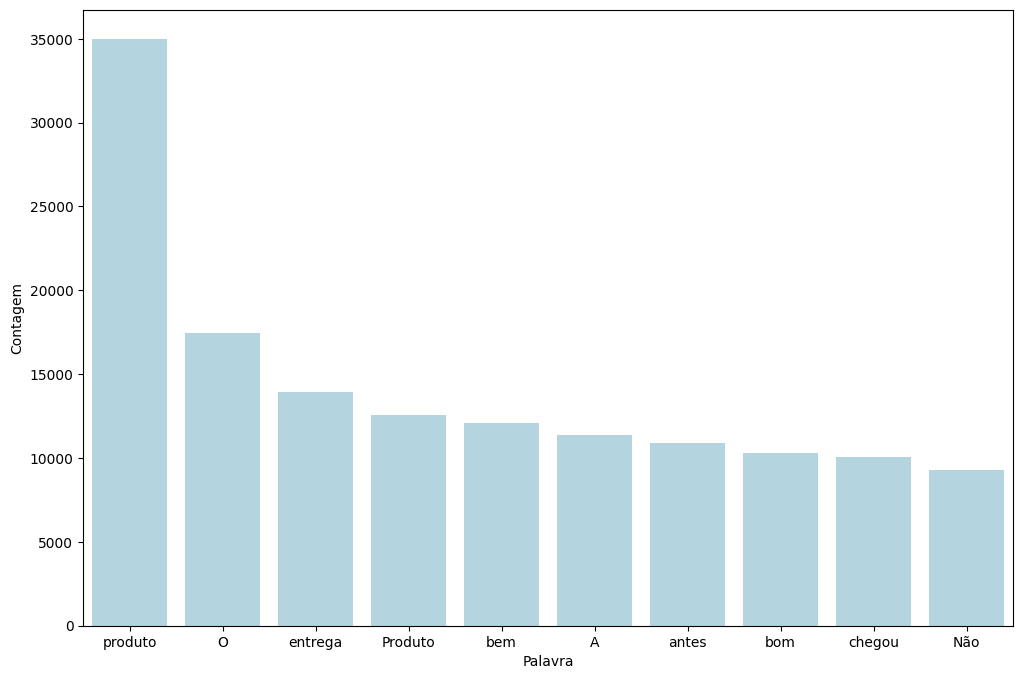

In [ ]:
grafico(avaliacoes, "texto_sem_stopwords", 10)

In [ ]:
from nltk import tokenize

frase = "Muito bom, este produto."

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

token_frase

['Muito', 'bom', ',', 'este', 'produto', '.']

In [ ]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  
0  Bem macio felpudo ... recomendo Preço imbatíve...  
1  Produto excepcional recomendo !!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio Adequado pessoas fazem uso...  
5  ótmo produto atendeu expectativas entrega ocor...

In [ ]:
avaliacoes.texto_sem_stopwords[5]

'ótmo produto atendeu expectativas, entrega ocorreu antes previsto. bom'

In [ ]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

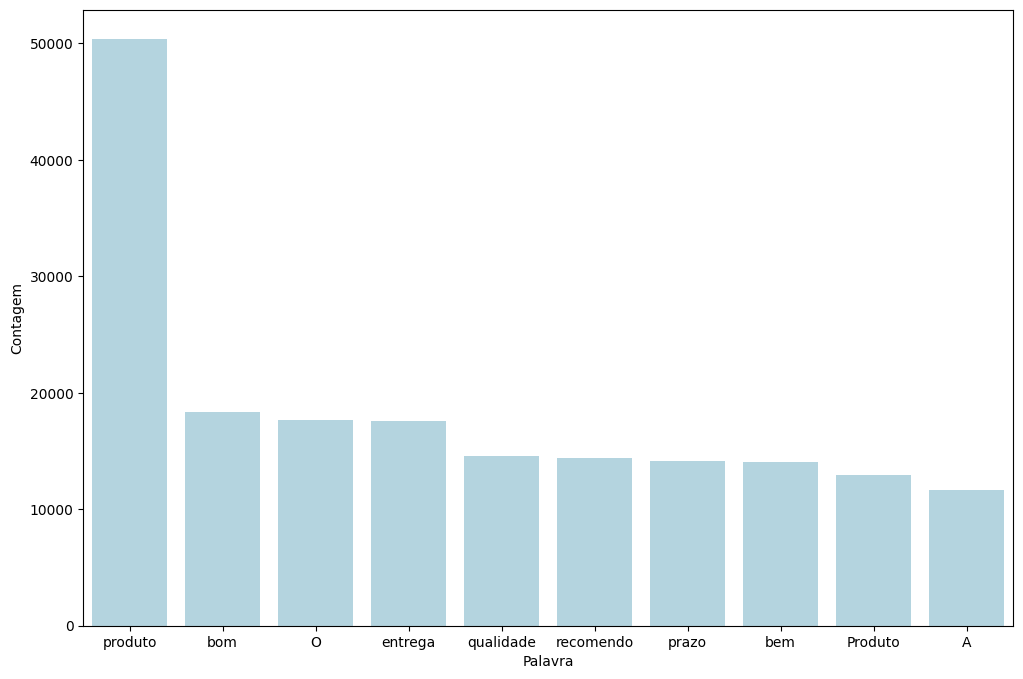

In [ ]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao", 10)

In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
import unidecode

acentos = "ótimo péssimo não tão é"

teste = unidecode.unidecode(acentos)
teste

'otimo pessimo nao tao e'

In [ ]:
sem_acentos = [unidecode.unidecode(texto) for texto in avaliacoes.texto_sem_stopwords_e_pontuacao]

In [ ]:
sem_acentos[4]

'otmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [ ]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [ ]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [ ]:
avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos"] = sem_acentos

frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  
0  Bem macio felpudo ... recomendo Preco imbative...  
1  Produto excepcional recomendo !!! inovador gos...  
2  recebi produto antes prazo veio defeito trava ...  
3  Bom custo beneficio Adequado pessoas fazem uso...  
5  otmo produto atendeu expectativas entrega ocor...

In [ ]:
treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos", "polarity")

0.8825090470446321

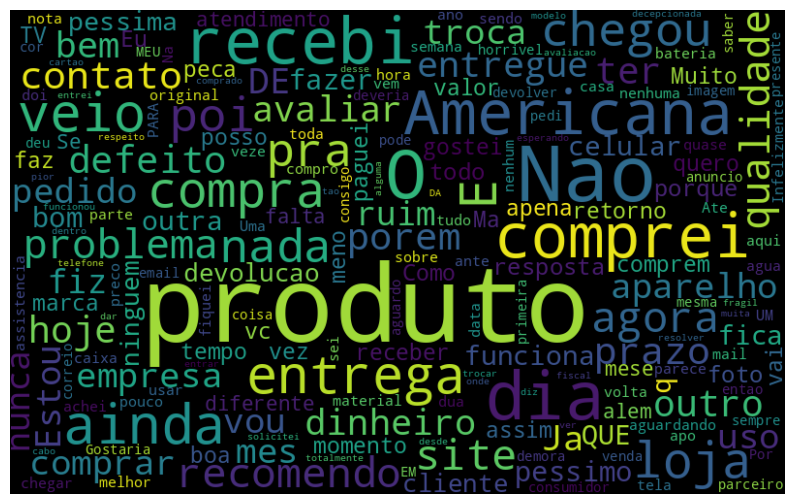

In [ ]:
word_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos")

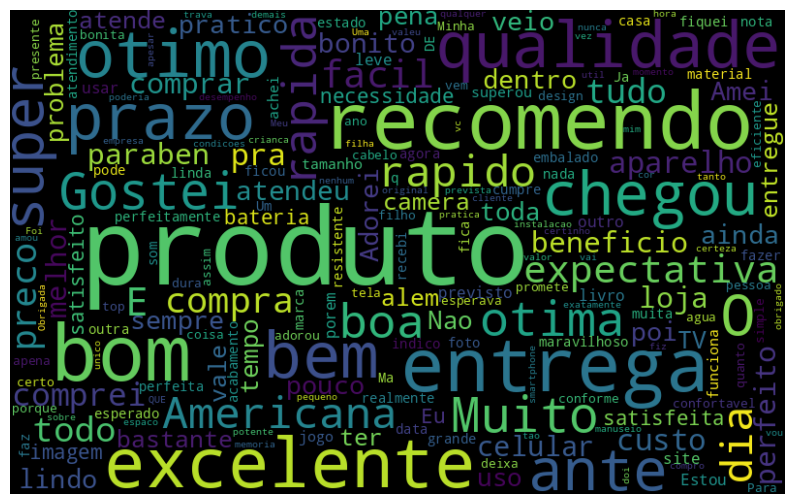

In [ ]:
word_cloud_pos(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos")

In [ ]:
frase = "O Rato Roeu a Roupa do Rei de Roma"
print(frase.lower())

o rato roeu a roupa do rei de roma


In [ ]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos:
  nova_frase = list()
  avaliacao = avaliacao.lower()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_sem_stopwords_e_pontuacao_e_acentos_minusculo"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  
0  bem macio felpudo ... recomendo preco imbative...   
1  produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  bom custo beneficio adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...

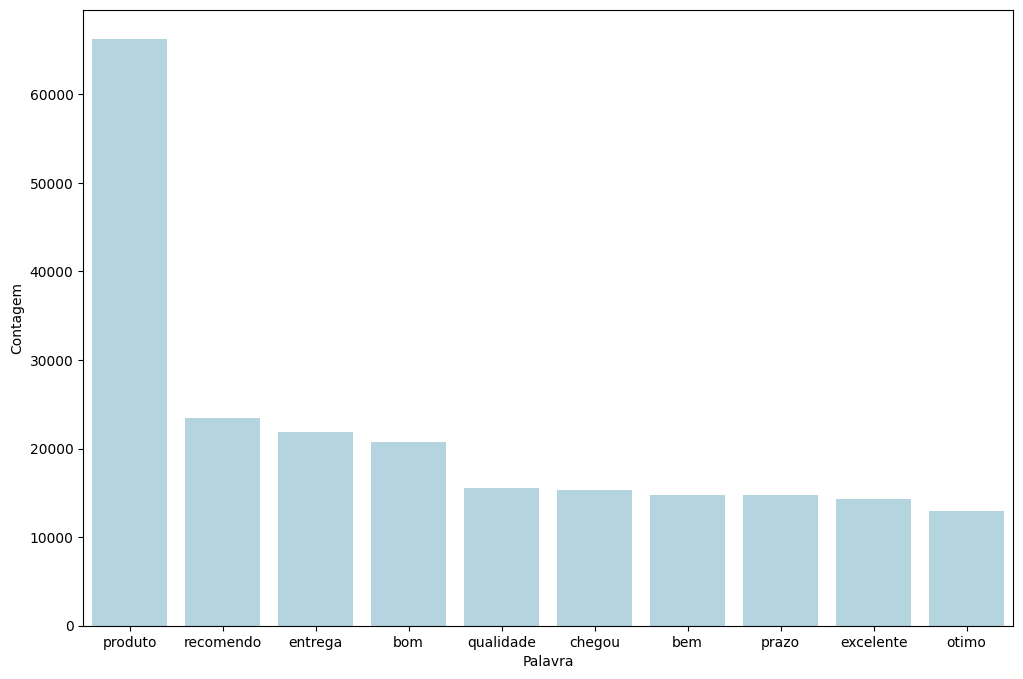

In [ ]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo", 10)

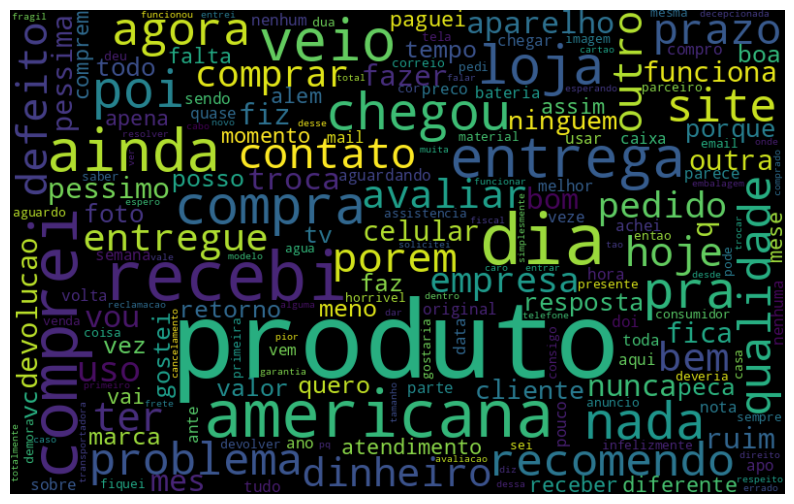

In [ ]:
word_cloud_neg(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo")

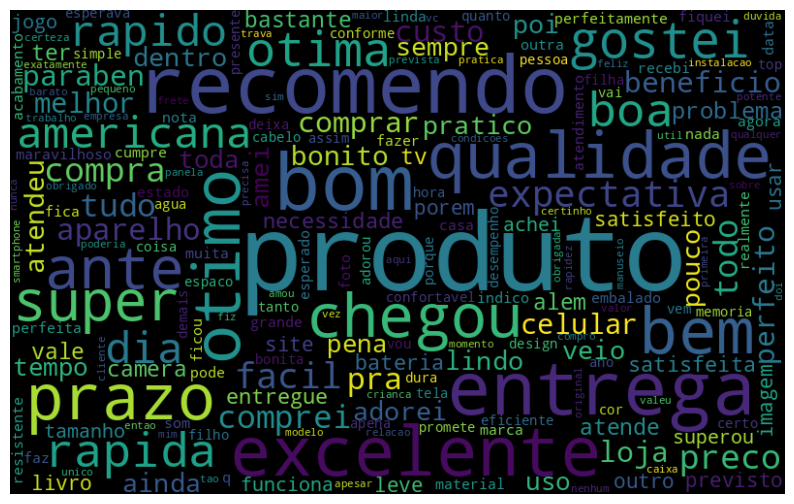

In [ ]:
word_cloud_pos(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo")

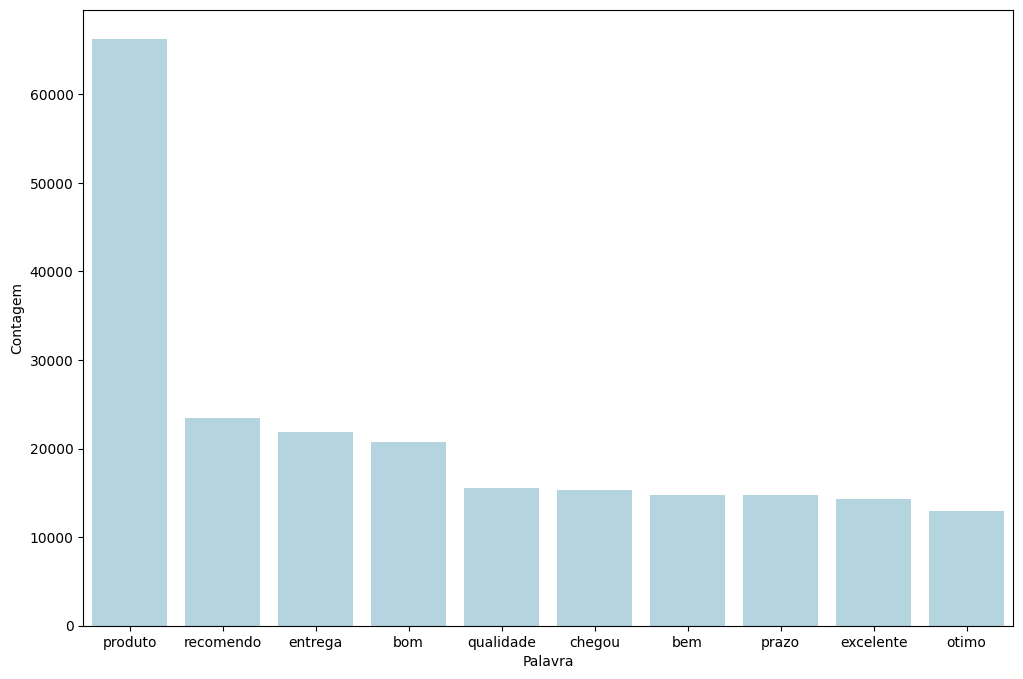

In [ ]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo", 10)

# Stemming RSLP

In [ ]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("Corredor")
stemmer.stem("Corre")
stemmer.stem("Correria")

'corr'

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  
0  bem macio felpudo ... recomendo preco imbative...   
1  produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  bom custo beneficio adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...

In [ ]:
frase_processada = list()
for avaliacao in avaliacoes.texto_sem_stopwords_e_pontuacao_e_acentos_minusculo:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(avaliacao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

avaliacoes["texto_stemmizado"] = frase_processada

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  \
0  bem macio felpudo ... recomendo preco imbative...    
1  produto excepcional recomendo !!! inovador gos...    
2  recebi produto antes prazo veio defeito trava ...    
3  bom custo beneficio adequado pessoas fazem uso...    
5  otmo produto atendeu expectativas entrega ocor...    

                                    texto_stemmizado  
0  bem maci felpud ... recom prec imbati entreg r...  
1           produt excepc recom !!! inov gost ler !!  
2  receb produt ant praz vei defeit tr us agor am...  
3  bom cust benefici adequ pesso faz uso cas apar...  
5  otm produt atend expect entreg ocorr ant previ...

In [ ]:
treinar_modelo(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo", "polarity")

0.8707909701878339

In [ ]:
treinar_modelo(avaliacoes, "texto_stemmizado", "polarity")

0.8853007065311046

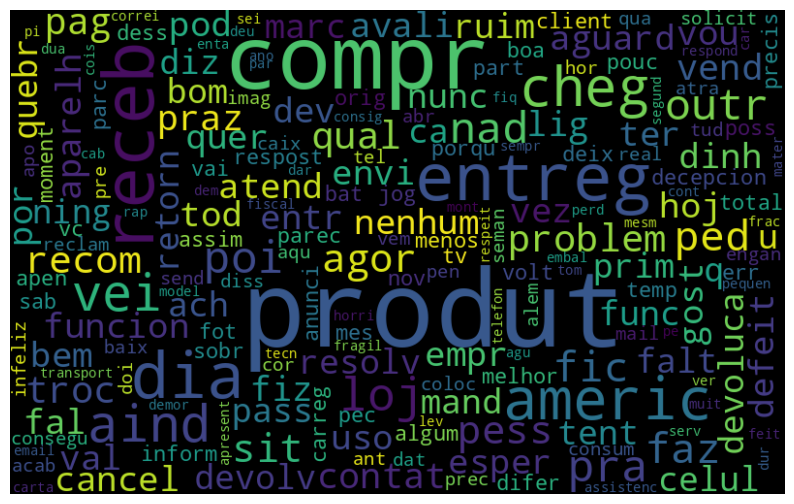

In [ ]:
word_cloud_neg(avaliacoes, "texto_stemmizado")

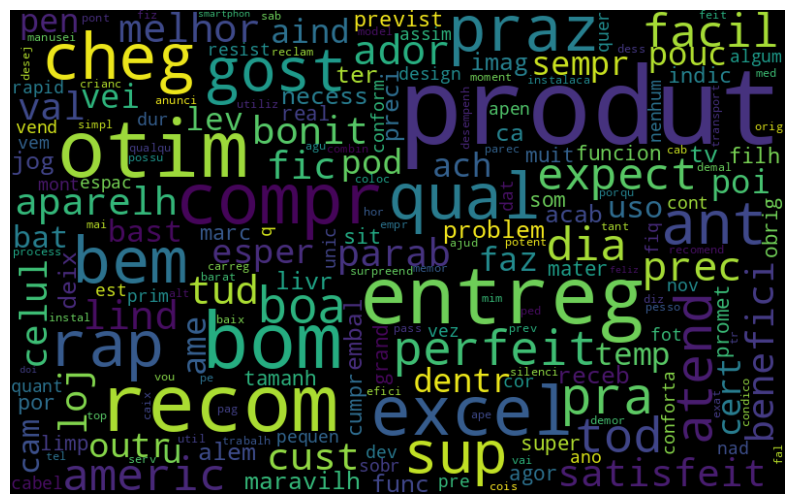

In [ ]:
word_cloud_pos(avaliacoes, "texto_stemmizado")

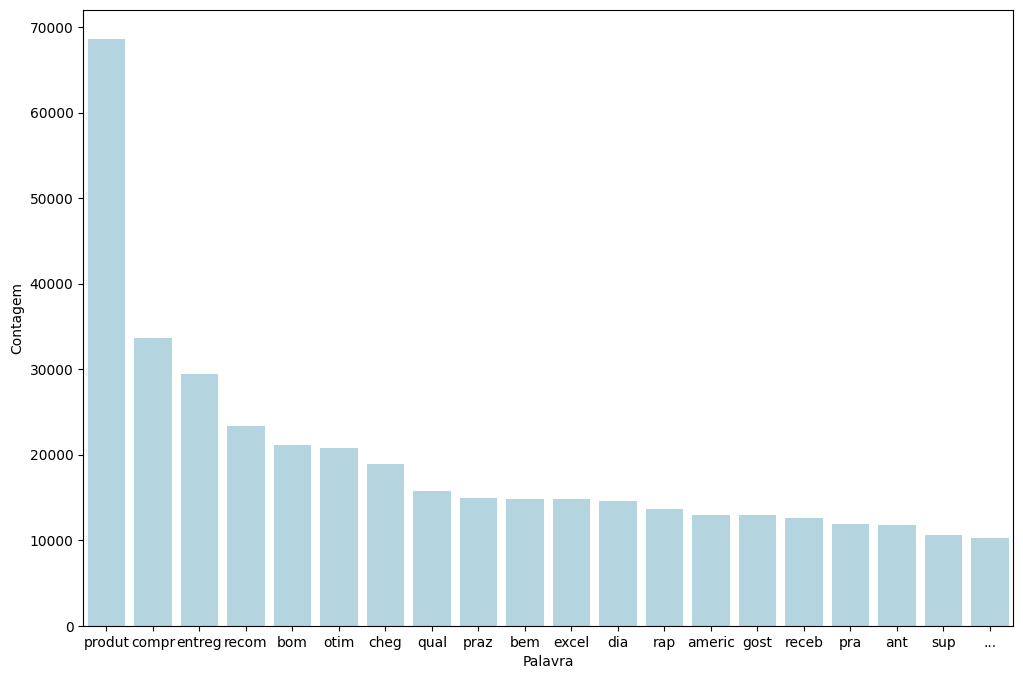

In [ ]:
grafico(avaliacoes, "texto_stemmizado", 20)

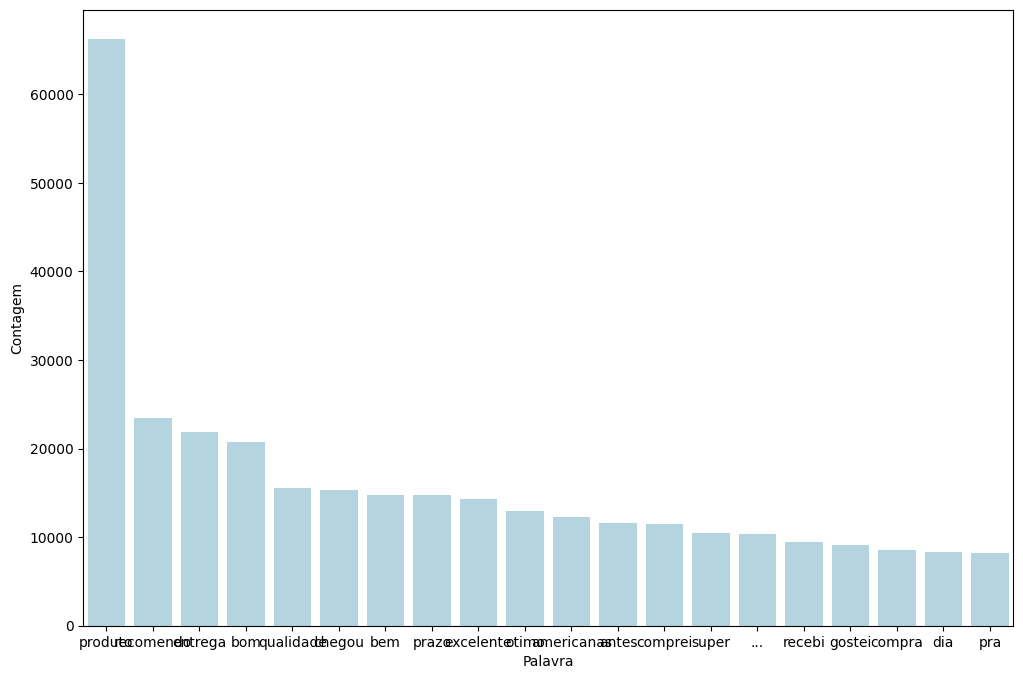

In [ ]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao_e_acentos_minusculo", 20)

# TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Este produto é muito bom", "Este produto é muito ruim"]
tfidf = TfidfVectorizer(lowercase=False, max_features=100)
caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names_out()
)

Este       bom     muito   produto      ruim
0  0.448321  0.630099  0.448321  0.448321  0.000000
1  0.448321  0.000000  0.448321  0.448321  0.630099

In [ ]:
avaliacoes.head()

review_text  polarity  \
0  Bem macio e felpudo...recomendo.  Preço imbatí...       1.0   
1  Produto excepcional!  recomendo!!! inovador e ...       1.0   
2  recebi o produto antes do prazo mas veio com d...       0.0   
3  Bom custo beneficio. Adequado para pessoas que...       1.0   
5  ótmo produto atendeu as expectativas, a entreg...       1.0   

                                 texto_sem_stopwords  \
0  Bem macio felpudo...recomendo. Preço imbatível...   
1  Produto excepcional! recomendo!!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio. Adequado pessoas fazem us...   
5  ótmo produto atendeu expectativas, entrega oco...   

                     texto_sem_stopwords_e_pontuacao  \
0  Bem macio felpudo ... recomendo Preço imbatíve...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  ótmo produto atendeu expectativas entrega ocor...   

           texto_sem_stopwords_e_pontuacao_e_acentos  \
0  Bem macio felpudo ... recomendo Preco imbative...   
1  Produto excepcional recomendo !!! inovador gos...   
2  recebi produto antes prazo veio defeito trava ...   
3  Bom custo beneficio Adequado pessoas fazem uso...   
5  otmo produto atendeu expectativas entrega ocor...   

  texto_sem_stopwords_e_pontuacao_e_acentos_minusculo  \
0  bem macio felpudo ... recomendo preco imbative...    
1  produto excepcional recomendo !!! inovador gos...    
2  recebi produto antes prazo veio defeito trava ...    
3  bom custo beneficio adequado pessoas fazem uso...    
5  otmo produto atendeu expectativas entrega ocor...    

                                    texto_stemmizado  
0  bem maci felpud ... recom prec imbati entreg r...  
1           produt excepc recom !!! inov gost ler !!  
2  receb produt ant praz vei defeit tr us agor am...  
3  bom cust benefici adequ pesso faz uso cas apar...  
5  otm produt atend expect entreg ocorr ant previ...

In [ ]:
tfidf_tratados = tfidf.fit_transform(avaliacoes.texto_stemmizado)

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              avaliacoes.polarity,
                                                              stratify=avaliacoes.polarity,
                                                              random_state=71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tdidf = regressao_logistica.score(teste, classe_teste)
acuracia_tdidf

0.8857142857142857

# NGrams

In [ ]:
from nltk import ngrams

frase = "Comprei um ótimo produto"
frase_separada = token_por_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'ótimo'), ('ótimo', 'produto')]

In [ ]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(avaliacoes.texto_stemmizado)

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              avaliacoes.polarity,
                                                              random_state=71)

regressao_logistica = LogisticRegression(max_iter=200)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams

0.9321385490263657

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range= (1, 2))
vetor_tfidf = tfidf.fit_transform(avaliacoes.texto_stemmizado)

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              avaliacoes.polarity,
                                                              random_state=71)

regressao_logistica = LogisticRegression(max_iter=200)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams

0.9360330863346545

In [ ]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names_out()
)

pesos.nlargest(10, 0)

0
otim       18.175662
excel      16.949479
bom        13.029600
perfeit    11.381989
ador       10.226311
satisfeit   8.751456
rap         8.603217
lind        8.463264
ame         7.408676
maravilh    7.300566

In [ ]:
pesos.nsmallest(10, 0)

0
pess      -10.538086
ruim       -8.878829
frac       -7.530981
receb      -7.484622
decepcion  -6.958159
horri      -6.654392
fragil     -6.366852
dinh       -6.269304
vei        -6.128587
devolv     -5.993126

In [ ]:
pesos.nlargest(100, 0)

0
otim             18.175662
excel            16.949479
bom              13.029600
perfeit          11.381989
ador             10.226311
...                    ...
funcion perfeit   2.166529
benefici          2.139843
boa qual          2.135355
entreg rap        2.127776
filh              2.109077

[100 rows x 1 columns]

In [ ]:
pesos.nsmallest(100, 0)

0
pess      -10.538086
ruim       -8.878829
frac       -7.530981
receb      -7.484622
decepcion  -6.958159
...              ...
arrepend   -2.407277
dia uso    -2.400843
lamenta    -2.391064
part       -2.380827
bom dia    -2.374309

[100 rows x 1 columns]